In [13]:
import numpy as np
from scipy.stats import multivariate_normal

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
df = pd.read_csv("Data1.csv")
df.head()

,Unnamed: 0,0,1
0,0,1.004939,2.319887
1,1,3.412653,-1.637157
2,2,7.483318,-1.399250
3,3,0.702826,2.038150
4,4,0.287620,2.191703


In [16]:
df = df.drop("Unnamed: 0",axis="columns")
df.head()

,0,1
0,1.004939,2.319887
1,3.412653,-1.637157
2,7.483318,-1.399250
3,0.702826,2.038150
4,0.287620,2.191703


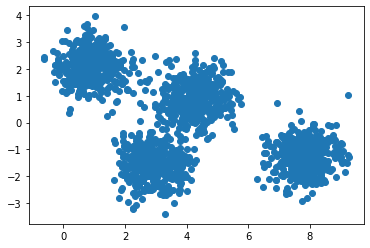

In [17]:

plt.scatter(df['0'],df['1'])

## 1. Apply model based clustering on Data 1

In [18]:
import numpy as np

def gaussian(data,mean,cov):
    l =[ ]
    data = np.array(data)
    d_cov = np.linalg.det(cov)
    den = 2*3.14*(d_cov)**0.5
    for x in data:
        a = np.array(x-mean)
        p = np.exp(np.linalg.multi_dot([a.T,np.linalg.inv(cov),a]))
        l.append(p)
    return np.array(l)/den
    
    
class Clustering():
    
    def __init__(self,X,n_clusters):
        self.mean = np.array(X.sample(n=n_clusters))
        X = np.array(X)
        self.k = n_clusters
        self.pi = np.ones(n_clusters)/n_clusters
        self.sample,self.feature = X.shape
        self.cov = np.zeros((self.k,self.feature,self.feature))
        self.data = X
        for i in range(self.k):
            self.cov[i] = np.eye(self.feature)
        self.z = np.zeros((self.sample, self.k))

    
    def fit(self,n_iters=20,eps=1e-8):
        
        for n in range(n_iters):
            old_mean = self.mean
            self.gamma = self.e_step()
            self.m_step()
#             y_p = model.predict()
            if n%2 ==0:    
                plt.scatter(df['0'],df['1'],c=model.predict())
                plt.scatter(model.mean[:,0],model.mean[:,1],marker='+',s=100,c='r')
                plt.show()
            if np.sum(np.square(self.mean-old_mean))<=eps:
                break
        print("Fitting Complete in ",n,"Iteration")
        
        
    def e_step(self):
        
        for i in range(self.k):
            self.z[:, i] = self.pi[i] * multivariate_normal.pdf(self.data, mean=self.mean[i], cov=self.cov[i])
        self.z /= self.z.sum(axis=1, keepdims=True)

    def m_step(self):
        
        sum_z = self.z.sum(axis=0)
        self.pi = sum_z / self.sample
        self.mean = np.matmul(self.z.T, self.data)
        self.mean /= sum_z[:, None]
        for i in range(self.k):
            j = np.expand_dims(self.data, axis=1) - self.mean[i]
            s = np.matmul(j.transpose([0, 2, 1]), j)
            self.cov[i] = np.matmul(s.transpose(1, 2, 0), self.z[:, i] )
            self.cov[i] /= sum_z[i]
    
    def predict(self):
        for i in range(self.k):
            self.z[:, i] = self.pi[i] * multivariate_normal.pdf(self.data, mean=self.mean[i], cov=self.cov[i])
        self.labels = np.argmax(self.z,axis=1)
        return self.labels

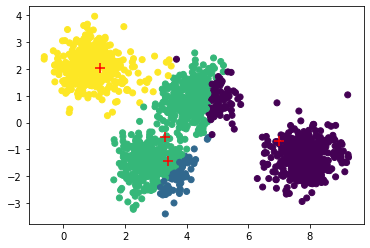

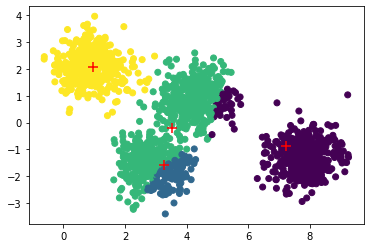

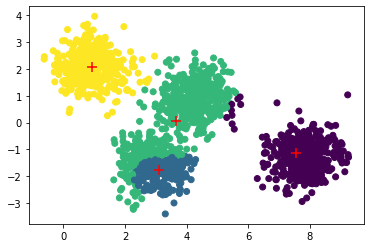

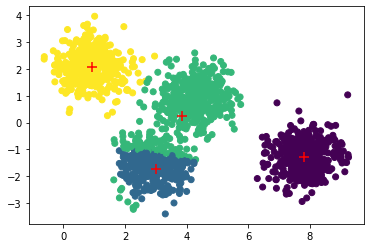

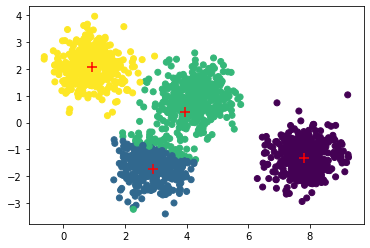

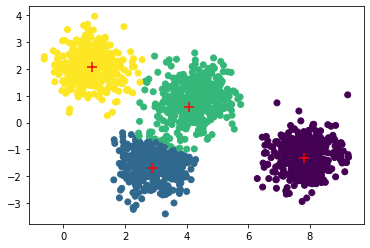

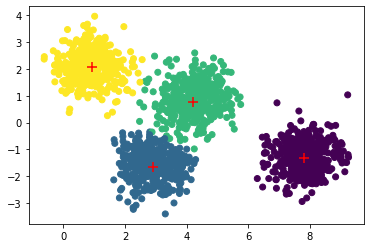

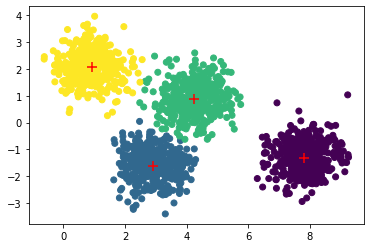

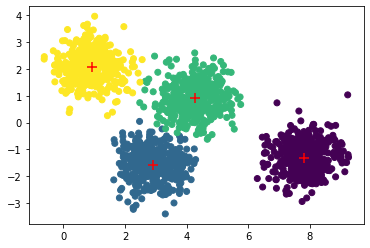

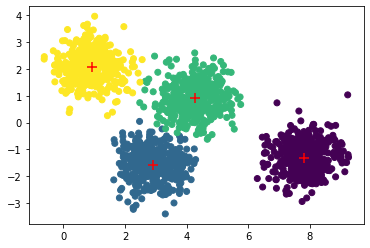

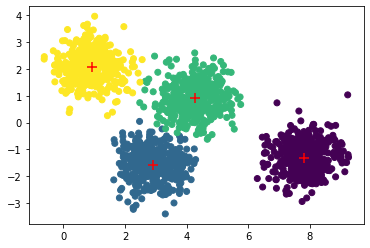

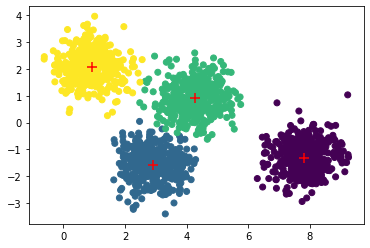

Fitting Complete in  22 Iteration


In [19]:
model = Clustering(df,4)
model.fit(500)

## (b) Plot the clusters.

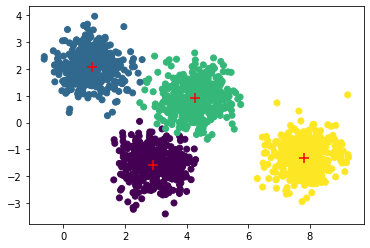

In [20]:
plt.scatter(df['0'],df['1'],c=model.predict())
plt.scatter(model.mean[:,0],model.mean[:,1],marker='+',s=100,c='r')

## (c) Report the mean, co-variance matrix and prior probability corresponding to each cluster

In [9]:
for i in range(model.k):
    print("Cluster :",i,"\n   Mean",model.mean[i],"\n  Covarience mat :\n",model.cov[i],"\n   Prior Probabilities :",model.pi[i])

Cluster : 0 
   Mean [4.26278152 0.90354643] 
  Covarience mat :
 [[0.36363002 0.01370182]
 [0.01370182 0.35796019]] 
   Prior Probabilities : 0.25190347691718
Cluster : 1 
   Mean [0.92324093 2.07801281] 
  Covarience mat :
 [[ 0.33647315 -0.01376586]
 [-0.01376586  0.33922314]] 
   Prior Probabilities : 0.2506421067048694
Cluster : 2 
   Mean [ 2.91981179 -1.57940073] 
  Covarience mat :
 [[ 0.32946543 -0.01153196]
 [-0.01153196  0.33580264]] 
   Prior Probabilities : 0.24751477355909388
Cluster : 3 
   Mean [ 7.80821915 -1.2980627 ] 
  Covarience mat :
 [[0.33175195 0.02484281]
 [0.02484281 0.3382142 ]] 
   Prior Probabilities : 0.24993964281885614


## (d) Assess the quality of the clusters.